using various libraries as this task is not as simple as mnist classification

In [2]:
import os

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
from io import BytesIO

from ipywidgets import widgets

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
TRAIN_DIR = 'train'
VAL_DIR   = 'test'

train_dogs_dir   = os.path.join(TRAIN_DIR, 'dogs')
train_cats_dir   = os.path.join(TRAIN_DIR, 'cats')
validate_dogs_dir = os.path.join(VAL_DIR, 'dogs')
validate_cats_dir = os.path.join(VAL_DIR, 'cats')

total samples to train and to validate our result on

In [4]:
print(f"total training dogs images: {len(os.listdir(train_dogs_dir))}")
print(f"total training cats images: {len(os.listdir(train_cats_dir))}")
print(f"total validation dogs images: {len(os.listdir(validate_dogs_dir))}")
print(f"total validation cats images: {len(os.listdir(validate_cats_dir))}")

total training dogs images: 10000
total training cats images: 10000
total validation dogs images: 2500
total validation cats images: 2500


some examples

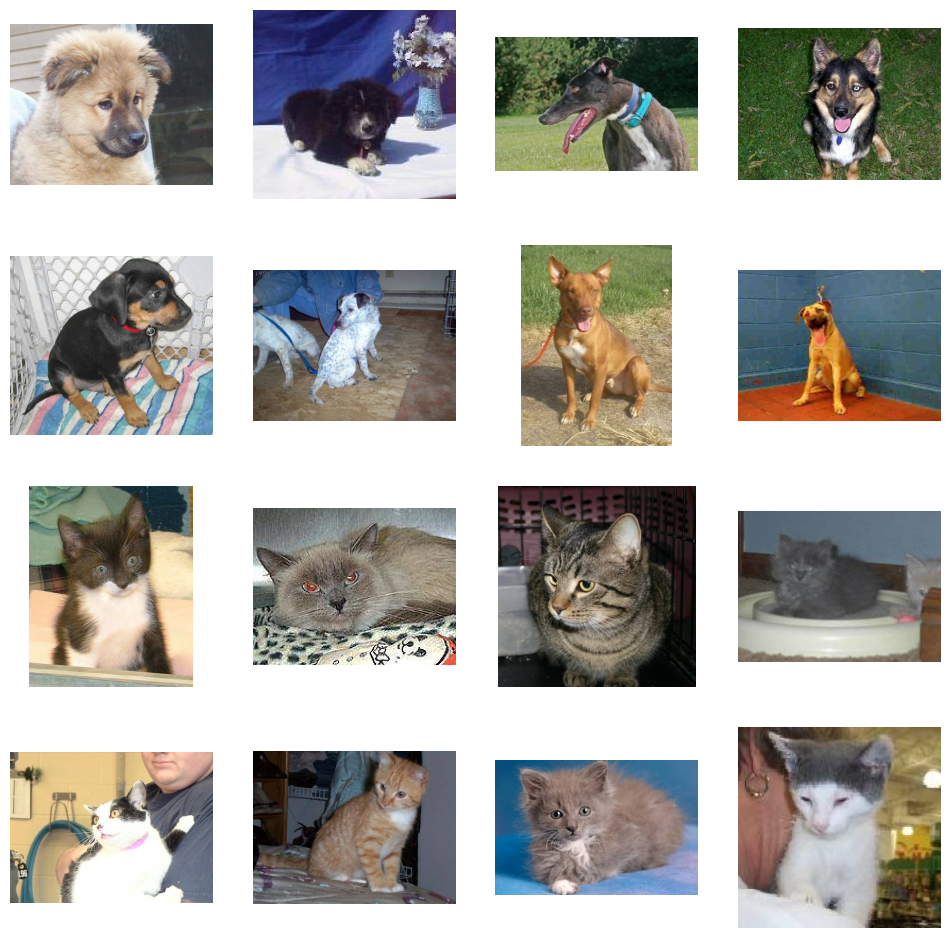

In [5]:
train_dogs_names = os.listdir(train_dogs_dir)
train_cats_names = os.listdir(train_cats_dir)

n_rows = 4
n_cols = 4

fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows * 3)

next_dogs_pix = [os.path.join(train_dogs_dir, fname)
                for fname in random.sample(train_dogs_names, k=8)]
next_cats_pix = [os.path.join(train_cats_dir, fname)
                for fname in random.sample(train_cats_names, k=8)]

for i, img_path in enumerate(next_dogs_pix + next_cats_pix):
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

going for 5 layers of Convolution and a 150 by 150 img for the current analysis
using a binary classifier in this with 0-> dogs and 1-> cats 
sigmoid suits best for this task

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

I0000 00:00:1752267303.822100    8710 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5109 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,537 (896.63 KB)

 Trainable params: 229,537 (896.63 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

Data Pre-Processing 

In [9]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
    )

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


normalization

In [10]:
rescale_layer = tf.keras.layers.Rescaling(1./255)

train_dataset_scaled = train_dataset.map(lambda image, label: (rescale_layer(image), label))
validation_dataset_scaled = validation_dataset.map(lambda image, label: (rescale_layer(image), label))

adding a few more methods to optimize training process and speed

In [11]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

validation_dataset_final = (validation_dataset_scaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

can't forget to not include early stopping callback

In [12]:
class EarlyStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') >= 0.985 :
            self.model.stop_training = True

In [13]:
history = model.fit(
    train_dataset_final,
    epochs=45,
    validation_data=validation_dataset_final,
    callbacks=[EarlyStopping()],  
    verbose=2
)

Epoch 1/45


I0000 00:00:1752267337.930441    8782 service.cc:152] XLA service 0x7f4a7c00e550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752267337.930458    8782 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-07-12 02:25:37.953668: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752267338.115612    8782 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1752267340.563207    8782 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 - 17s - 27ms/step - accuracy: 0.6277 - loss: 0.6329 - val_accuracy: 0.7328 - val_loss: 0.5369
Epoch 2/45
625/625 - 7s - 11ms/step - accuracy: 0.7471 - loss: 0.5129 - val_accuracy: 0.7518 - val_loss: 0.5299
Epoch 3/45
625/625 - 6s - 10ms/step - accuracy: 0.7982 - loss: 0.4357 - val_accuracy: 0.8240 - val_loss: 0.3858
Epoch 4/45
625/625 - 7s - 11ms/step - accuracy: 0.8321 - loss: 0.3744 - val_accuracy: 0.7564 - val_loss: 0.5475
Epoch 5/45
625/625 - 7s - 11ms/step - accuracy: 0.8614 - loss: 0.3166 - val_accuracy: 0.8322 - val_loss: 0.3880
Epoch 6/45
625/625 - 7s - 11ms/step - accuracy: 0.8819 - loss: 0.2749 - val_accuracy: 0.8820 - val_loss: 0.2911
Epoch 7/45
625/625 - 7s - 11ms/step - accuracy: 0.8990 - loss: 0.2383 - val_accuracy: 0.8648 - val_loss: 0.3270
Epoch 8/45
625/625 - 7s - 11ms/step - accuracy: 0.9148 - loss: 0.2064 - val_accuracy: 0.8824 - val_loss: 0.2808
Epoch 9/45
625/625 - 7s - 11ms/step - accuracy: 0.9260 - loss: 0.1825 - val_accuracy: 0.8780 - val_loss: 0.3987
Ep

metrics visualized

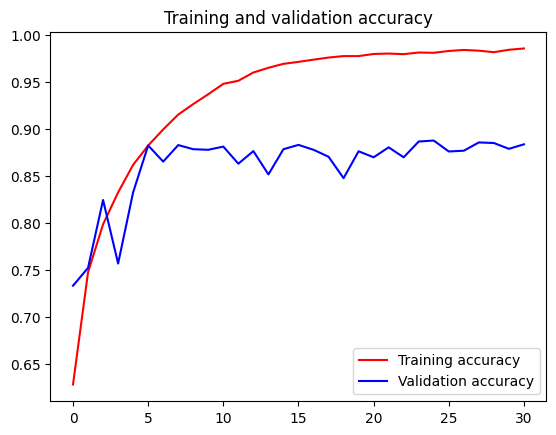

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

features transformed through each layer

/tmp/ipykernel_8710/949372650.py:30: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipykernel_8710/949372650.py:33: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


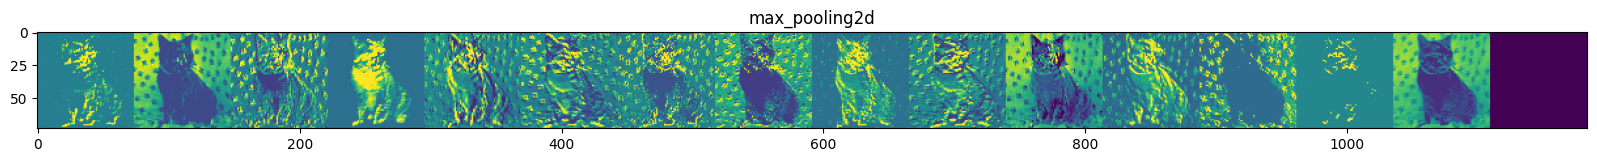

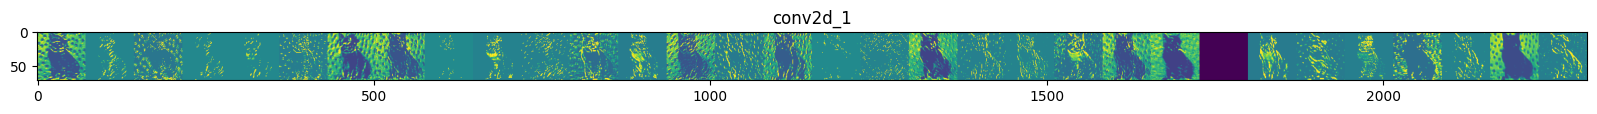

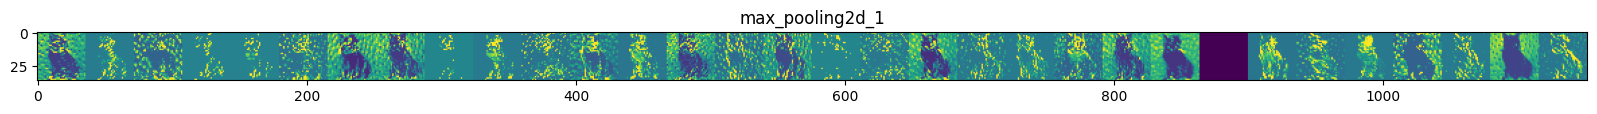

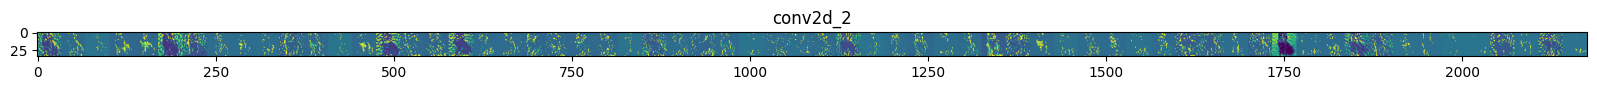

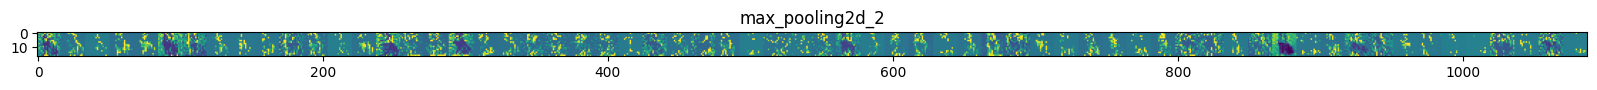

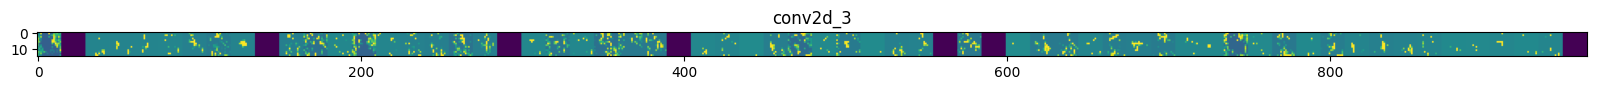

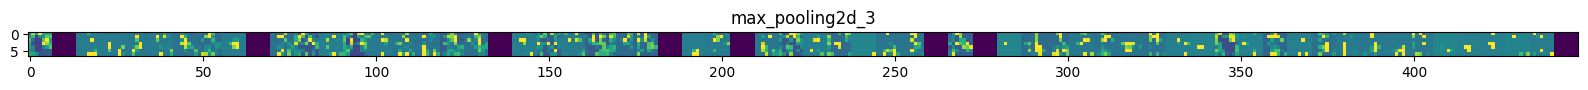

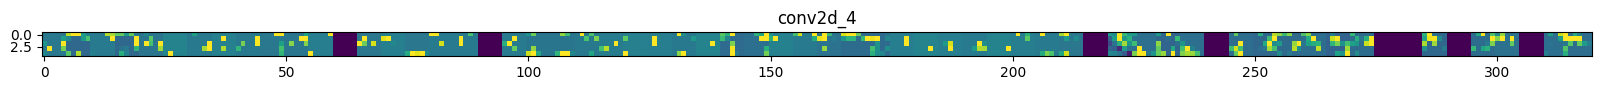

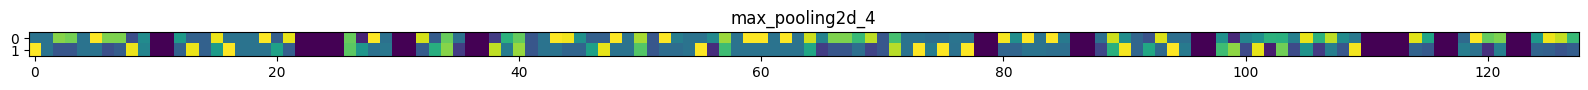

In [15]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

dogs_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_names]
cats_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_names]
img_path = random.choice(dogs_img_files + cats_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(150, 150))  
x = tf.keras.utils.img_to_array(img)  
x = x.reshape((1,) + x.shape) 

x = rescale_layer(x)


successive_feature_maps = visualization_model.predict(x, verbose=False)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        n_features = feature_map.shape[-1] 

        size = feature_map.shape[1]

        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            display_grid[:, i * size : (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

Random Test

In [17]:
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a dog")
        else:
            print(filename + " is a cat")


def on_upload_change(change):
    
    items = change.new
    for item in items: 
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()